## Import packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

## Read and display the image

In [3]:
image=cv2.imread('C:\\Ellen\\Udacity\\Computer_Vision\\data\\bluescreen.jpg')

In [4]:
# Print out some information
print('Type image:')
type(image)

Type image:


numpy.ndarray

In [5]:
# Print out the shape of the image
print('Shape image:')
image.shape

Shape image:


(472L, 863L, 3L)

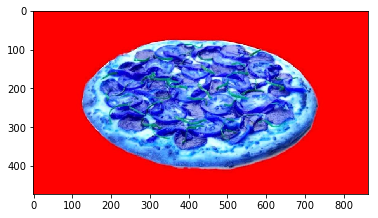

In [6]:
plt.imshow(image)

So, in order to change the color, let us first take a copy:

In [7]:
image_copy = np.copy(image)

Change this to the RGB:

In [8]:
image_copy = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

Now check if the color has come properly:

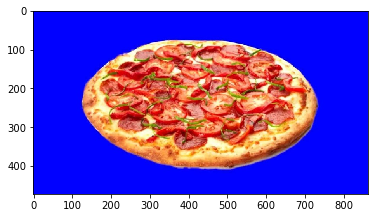

In [9]:
plt.imshow(image_copy)

## Define the color threshold

I want to ultimately get rid of the blue screen. Set the red, green and blue as such that you later on can get rid of the blue background.

In [10]:
# Define color selection boundaries
lower_blue = np.array([0,0,230])
upper_blue = np.array([50,50,255])

## Create a mask

In [11]:
mask = cv2.inRange(image_copy,lower_blue,upper_blue)
mask.shape

(472L, 863L)

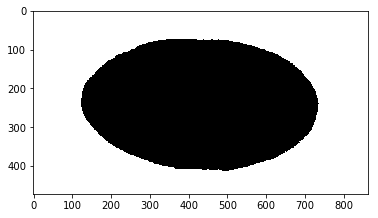

In [12]:
plt.imshow(mask,cmap='gray')

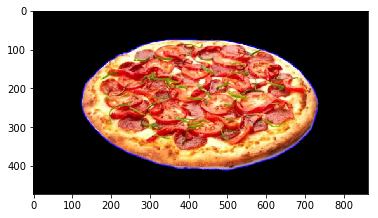

In [13]:
masked_image = np.copy(image_copy)

masked_image[mask!=0] = [0,0,0] # Set this to black - in RGB, black is zero in all the three values

plt.imshow(masked_image)

You still see that you have some blue on the side, what you can do is to change the values:

In [14]:
# Define color selection boundaries
lower_blue = np.array([0,0,210]) # Decrease this
upper_blue = np.array([50,70,255])

In [15]:
mask = cv2.inRange(image_copy,lower_blue,upper_blue)
mask.shape

(472L, 863L)

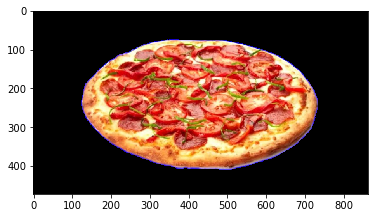

In [16]:
masked_image[mask!=0] = [0,0,0] # Set this to black - in RGB, black is zero in all the three values

plt.imshow(masked_image)

### Mask and add a background image

## Apply a background to the image:
Read in another image:

In [17]:
background_image=cv2.imread('C:\\Ellen\\Udacity\\Computer_Vision\\data\\space.jpg')
background_image = cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)

In [18]:
# Shape of the image:
background_image.shape

(7200L, 7200L, 3L)

Crop this image to the right size:

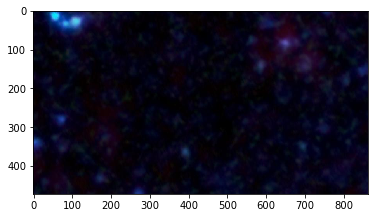

In [19]:
crop_background = background_image[0:472,0:863]
plt.imshow(crop_background)

Mask the cropped background:

In [20]:
crop_background[mask==0] = [0,0,0]

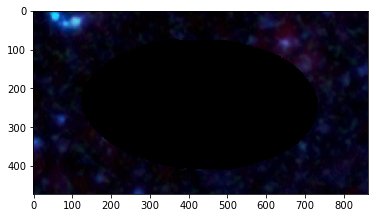

In [21]:
plt.imshow(crop_background)

In [22]:
## Add the two images together:
complete_image = crop_background + masked_image

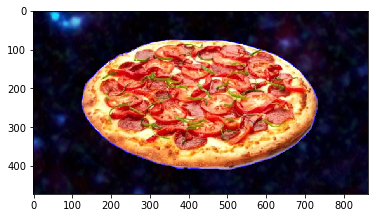

In [23]:
plt.imshow(complete_image)

In [24]:
## Now apply this to a stop sign

In [25]:
stop_image=cv2.imread('C:\\Ellen\\Udacity\\Computer_Vision\\data\\germany.jpg')


In [26]:
stop_image.shape

(1500L, 1040L, 3L)

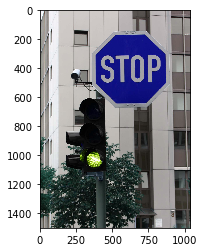

In [27]:
plt.imshow(stop_image)

In [28]:
## Change to RGB:
stop_image = cv2.cvtColor(stop_image,cv2.COLOR_BGR2RGB)

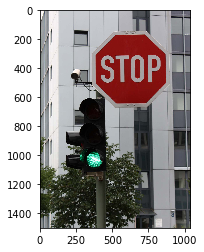

In [29]:
plt.imshow(stop_image)

In [30]:
# Define color selection boundaries
#lower_red = np.array([30,150,50]) # Decrease this
#upper_red = np.array([255,255,180])

##lower_red = np.array([30,7,10]) # Decrease this
##upper_red = np.array([150,50,20])

lower_red = np.array([30,7,10]) # Decrease this
upper_red = np.array([255,20,20])

In [31]:
mask = cv2.inRange(stop_image,lower_red,upper_red)

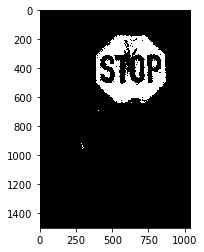

In [32]:
plt.imshow(mask,cmap='gray')

In [33]:
stop_image[mask!=0] = [0,0,0]
print(mask)
unique, counts = np.unique(mask, return_counts=True)
print (unique)
print (counts)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[  0 255]
[1434450  125550]


If you do NOT fullfill, the mask will be black, otherwise it will be white. From the sign above, we can see that the stop sign is white. Where it fullfills, you have the value 255, otherwise you have the value 0. 

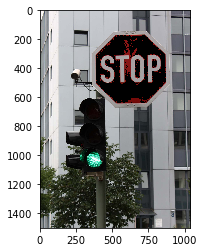

In [34]:
plt.imshow(stop_image,cmap='gray')

## Download the actual image for the assignment

Downloaded the image from:

https://commons.wikimedia.org/wiki/File:Stop_Sign_in_Australia.JPG

In [35]:
image=cv2.imread('C:\\Ellen\\Udacity\\Computer_Vision\\data\\Stop_Sign_in_Australia.jpg')

In [36]:
image.shape

(2736L, 3648L, 3L)

In [43]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In order to play around with the colors, I used the following tool:

http://www.ginifab.com/feeds/pms/pms_color_in_image.php 

In [38]:
## TODO: Define the color selection criteria
lower_red = np.array([180,8,10]) 
upper_red = np.array([230,60,70])

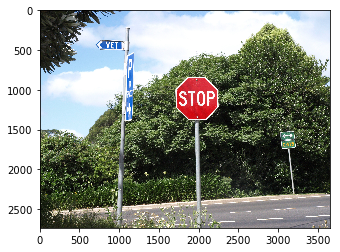

In [39]:
# Mask the image 
masked_image = np.copy(image)
mask = cv2.inRange(masked_image, lower_red, upper_red)

plt.imshow(image)

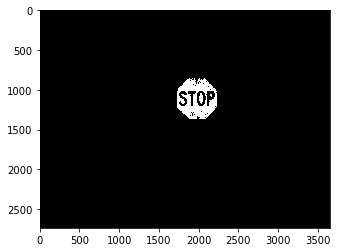

In [40]:
plt.imshow(mask,cmap='gray')

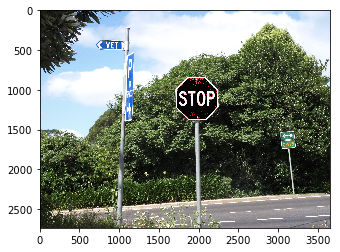

In [41]:
masked_image[mask!=0] = [0,0,0]


# ---------------------------------------------------------- #
# Display it
plt.imshow(masked_image)

## References

http://www.ginifab.com/feeds/pms/pms_color_in_image.php - For hovering over an image and then you can see the pixel values.

https://www.w3schools.com/colors/colors_picker.asp - Link from the course which is a color picker. 